#  Machine learning modeling implementation by using yelp dataset from Kaggle

* Superwised Methods    
    * Logistic Regression 
    * KNN 
    * SVM
    * Decision Tree
    * Random Forest
* Unsuperwised Methods 
    * K-means Clustering
    * Hierarchical Clustering

* Business.json
* Checkin.json
* tip.json
* users.json
    
https://www.kaggle.com/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_business.json

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import scipy.stats as stats
from collections import Counter

plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)




pd.set_option('display.float_format', '{:.2f}'.format)


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Read Dataset

business = pd.read_json("yelp_business.json",lines=True)

users = pd.read_json("yelp_user.json", lines=True)

checkins = pd.read_json("yelp_checkin.json",lines=True)

tips = pd.read_json("yelp_tip.json",lines=True)

In [2]:
df = pd.read_csv("merged_data.csv")

# Data Preparation

In [3]:
df.address.value_counts() 
# ilgili sütunda kullanabileceğim anlamlı veri yok. Sileceğiz.
# There is no meaningful data that I can use in the relevant column. We will delete it.

5757 Wayne Newton Blvd          97
3200 Las Vegas Blvd S           81
7014 E Camelback Rd             79
3111 W Chandler Blvd            76
4400 Sharon Rd                  71
                                ..
5809 Monona Dr                   1
5901 E McKellips Rd, Ste 109     1
60 Quarry Edge Drive             1
2933 Eastway Dr                  1
Superstition Springs Blvd        1
Name: address, Length: 148814, dtype: int64

In [5]:
df['categories'].value_counts()

Restaurants, Pizza                                                                                                                                             1092
Pizza, Restaurants                                                                                                                                             1060
Coffee & Tea, Food                                                                                                                                             1036
Nail Salons, Beauty & Spas                                                                                                                                     1015
Beauty & Spas, Nail Salons                                                                                                                                      981
                                                                                                                                                               ... 
Beauty & Spas, M

In [6]:
values = ' '.join([str(i) for i in df['categories']])

In [7]:
df_values = pd.DataFrame(values.split(','),columns=['category'])

In [8]:
df_values.value_counts()[:20]

category                  
 Restaurants                  21237
 Shopping                     14914
 Food                         11874
 Home Services                 8015
 Health & Medical              7430
 Beauty & Spas                 7280
 Nightlife                     7103
 Bars                          6479
 Local Services                6266
 Event Planning & Services     5310
 Active Life                   4565
 Automotive                    4477
 Fashion                       4098
 Home & Garden                 3651
 Sandwiches                    3630
 American (Traditional)        3592
 Professional Services         3201
 Fast Food                     3064
 Arts & Entertainment          2868
 Coffee & Tea                  2855
dtype: int64

In [9]:
restaurant_indexes = []
count = df['categories'].index
for i in count:    
    for j in range(0, len(str(df['categories'][i]).split(","))):       
        if str(df['categories'][i]).split(",")[j].strip() == "Restaurants":
            restaurant_indexes.append(i) 

In [10]:
df_restaurant = df.loc[restaurant_indexes]

In [11]:
df_restaurant.shape

(57173, 33)

In [12]:
df_restaurant["categories"] = "Restaurants"

In [13]:
df = df_restaurant

In [14]:
df.categories.value_counts()

Restaurants    57173
Name: categories, dtype: int64

In [15]:
df.good_for_kids.value_counts()

1    41567
0    15606
Name: good_for_kids, dtype: int64

In [16]:
df.takes_credit_cards.value_counts() 

1    46439
0    10734
Name: takes_credit_cards, dtype: int64

In [17]:
df.take_reservations.value_counts() 

0    37762
1    19411
Name: take_reservations, dtype: int64

In [18]:
df.sample(1)

Unnamed: 0                    address  alcohol?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           attributes             business_id   categories       city  good_for_kids  has_bike_parking  has_wifi                                                                                                                                                                    hours  is_open  latitude  longitude                  name neighborhood postal_code  price_range  review_count  stars state  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 time  weekday_checkins  weekend_checkins  average_tip_length  number_tips
91861       91861  205 East Waterfront Drive         1  {'Alcohol': 'full_bar', 'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}", 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'b...  WtO8eoYmrc2_8kuXanug2Q  Restaurants  Homestead              1                 1         1  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0', 'Wednesday': '11:0-23:0', 'Thursday': '11:0-23:0', 'Friday': '11:0-0:0', 'Saturday': '11:0-0:0', 'Sunday': '11:0-23:0'}        1     40.41     -79.91  Uno Pizzeria & Grill    Homestead       15120            2            69   3.00    PA                  0                   1                  182.28               1928.97                13.99                211.48                        1.87  {'Fri-0': 4, 'Mon-0': 1, 'Sat-0': 7, 'Sun-0': 8, 'Thu-0': 3, 'Tue-0': 1, 'Wed-0': 1, 'Fri-1': 3, 'Mon-1': 3, 'Sat-1': 13, 'Sun-1': 8, 'Tue-1': 1, 'Wed-1': 1, 'Fri-2': 2, 'Mon-2': 1, 'Sat-2': 1, 'Sun-2': 3, 'Thu-3': 1, 'Thu-4': 1, 'Sat-11': 1, 'Sun-13': 1, 'Fri-15': 1, 'Mon-15': 1, 'Sun-15': 1, 'Thu-15': 1, 'Wed-15': 2, 'Fri-16': 2, 'Mon-16': 1, 'Sat-16': 4, 'Thu-16': 1, 'Wed-16': 2, 'Mon-17': 1, 'Sat-17': 3, 'Sun-17': 7, 'Tue-17': 1, 'Wed-17': 3, 'Fri-18': 2, 'Mon-18': 2, 'Sat-18': 5, 'Sun-1...             73.00            147.00               59.83        18.00

In [20]:
will_be_deleted = ["Unnamed: 0","address", "attributes", "categories", "city", "hours", "is_open", "latitude", "longitude", "name", "neighborhood", "postal_code", "state", "time" ]

In [21]:
df.drop(columns = will_be_deleted, inplace = True)

In [22]:
df.head()

alcohol?             business_id  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  stars  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips
0         0  Apn5Q_b6Nz61Tq4XzPdf9A              1                 0         0            2            24   4.00                  1                   1                   42.83               1809.38                 5.38                114.88                        1.12             11.00             18.00               38.00         6.00
1         0  AjEbIBw6ZFfln7ePHha9PA              1                 0         0            2             3   4.50                  0                   1                   64.33                970.33                 2.67                 19.67                        0.67              0.00              1.00               66.00         1.00
2         1  O8S5hYJ1SMc8fA4QBtVujA              1                 1         1            2             5   4.00                  1                   0                    4.20               1499.60                 1.00                 24.60                        0.60              2.00              5.00               32.00         1.00
7         0  6OuOZAok8ikONMS_T3EzXg              1                 0         0            2             7   2.00                  0                   1                   22.14               2265.29                 4.00                 40.43                        1.14               NaN               NaN                 NaN          NaN
8         0  8-NRKkPY1UiFXW20WXKiXg              1                 1         0            1            40   2.50                  0                   1                   84.65               2363.50                 6.33                110.45                        1.20             75.00             54.00               48.83        18.00

In [23]:
df.set_index("business_id", inplace = True)

In [24]:
df.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  stars  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips
business_id                                                                                                                                                                                                                                                                                                                                   
Apn5Q_b6Nz61Tq4XzPdf9A         0              1                 0         0            2            24   4.00                  1                   1                   42.83               1809.38                 5.38                114.88                        1.12             11.00             18.00               38.00         6.00
AjEbIBw6ZFfln7ePHha9PA         0              1                 0         0            2             3   4.50                  0                   1                   64.33                970.33                 2.67                 19.67                        0.67              0.00              1.00               66.00         1.00
O8S5hYJ1SMc8fA4QBtVujA         1              1                 1         1            2             5   4.00                  1                   0                    4.20               1499.60                 1.00                 24.60                        0.60              2.00              5.00               32.00         1.00
6OuOZAok8ikONMS_T3EzXg         0              1                 0         0            2             7   2.00                  0                   1                   22.14               2265.29                 4.00                 40.43                        1.14               NaN               NaN                 NaN          NaN
8-NRKkPY1UiFXW20WXKiXg         0              1                 1         0            1            40   2.50                  0                   1                   84.65               2363.50                 6.33                110.45                        1.20             75.00             54.00               48.83        18.00

In [25]:
df.isnull().sum()

alcohol?                         0
good_for_kids                    0
has_bike_parking                 0
has_wifi                         0
price_range                      0
review_count                     0
stars                            0
take_reservations                0
takes_credit_cards               0
average_number_friends           0
average_days_on_yelp             0
average_number_fans              0
average_review_count             0
average_number_years_elite       0
weekday_checkins              2153
weekend_checkins              2153
average_tip_length            8595
number_tips                   8595
dtype: int64

In [26]:
df.stars.shape

(57173,)

In [27]:
df.stars.value_counts()

4.00    13937
3.50    13888
3.00    10292
4.50     6754
2.50     5799
2.00     3212
5.00     1623
1.50     1255
1.00      413
Name: stars, dtype: int64

In [28]:
star_map = {1.00:1,
            1.50:2,
            2.00:3,
            2.50:4,
            3.00:5,
            3.50:6,
            4.00:7,
            4.50:8,
            5.00:9
           }
star_map

{1.0: 1, 1.5: 2, 2.0: 3, 2.5: 4, 3.0: 5, 3.5: 6, 4.0: 7, 4.5: 8, 5.0: 9}

In [29]:
df["Stars"] = df["stars"].map(star_map)

In [30]:
df.drop('stars', axis=1, inplace= True)

In [31]:
df["Stars"] = df["Stars"].astype("int")

In [33]:
df.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  Stars
business_id                                                                                                                                                                                                                                                                                                                                   
Apn5Q_b6Nz61Tq4XzPdf9A         0              1                 0         0            2            24                  1                   1                   42.83               1809.38                 5.38                114.88                        1.12             11.00             18.00               38.00         6.00      7
AjEbIBw6ZFfln7ePHha9PA         0              1                 0         0            2             3                  0                   1                   64.33                970.33                 2.67                 19.67                        0.67              0.00              1.00               66.00         1.00      8
O8S5hYJ1SMc8fA4QBtVujA         1              1                 1         1            2             5                  1                   0                    4.20               1499.60                 1.00                 24.60                        0.60              2.00              5.00               32.00         1.00      7
6OuOZAok8ikONMS_T3EzXg         0              1                 0         0            2             7                  0                   1                   22.14               2265.29                 4.00                 40.43                        1.14               NaN               NaN                 NaN          NaN      3
8-NRKkPY1UiFXW20WXKiXg         0              1                 1         0            1            40                  0                   1                   84.65               2363.50                 6.33                110.45                        1.20             75.00             54.00               48.83        18.00      4

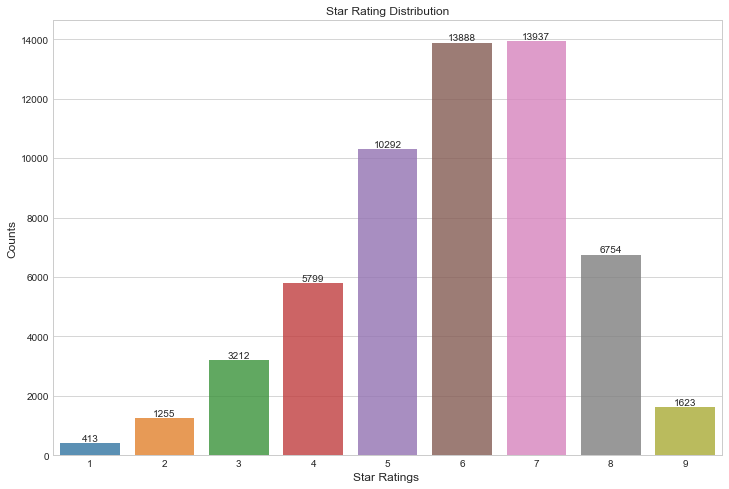

In [34]:
x = df.Stars.value_counts().sort_index()

#sns.countplot(df.stars, alpha = 0.7)

plt.figure(figsize=(12,8))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

## Filling Missing Values in Column

In [35]:
df.isna().sum()

alcohol?                         0
good_for_kids                    0
has_bike_parking                 0
has_wifi                         0
price_range                      0
review_count                     0
take_reservations                0
takes_credit_cards               0
average_number_friends           0
average_days_on_yelp             0
average_number_fans              0
average_review_count             0
average_number_years_elite       0
weekday_checkins              2153
weekend_checkins              2153
average_tip_length            8595
number_tips                   8595
Stars                            0
dtype: int64

In [36]:
df = df.dropna(axis = 0)

In [37]:
df.isna().sum()

alcohol?                      0
good_for_kids                 0
has_bike_parking              0
has_wifi                      0
price_range                   0
review_count                  0
take_reservations             0
takes_credit_cards            0
average_number_friends        0
average_days_on_yelp          0
average_number_fans           0
average_review_count          0
average_number_years_elite    0
weekday_checkins              0
weekend_checkins              0
average_tip_length            0
number_tips                   0
Stars                         0
dtype: int64

In [38]:
df.shape

(47964, 18)

## Outlier detection

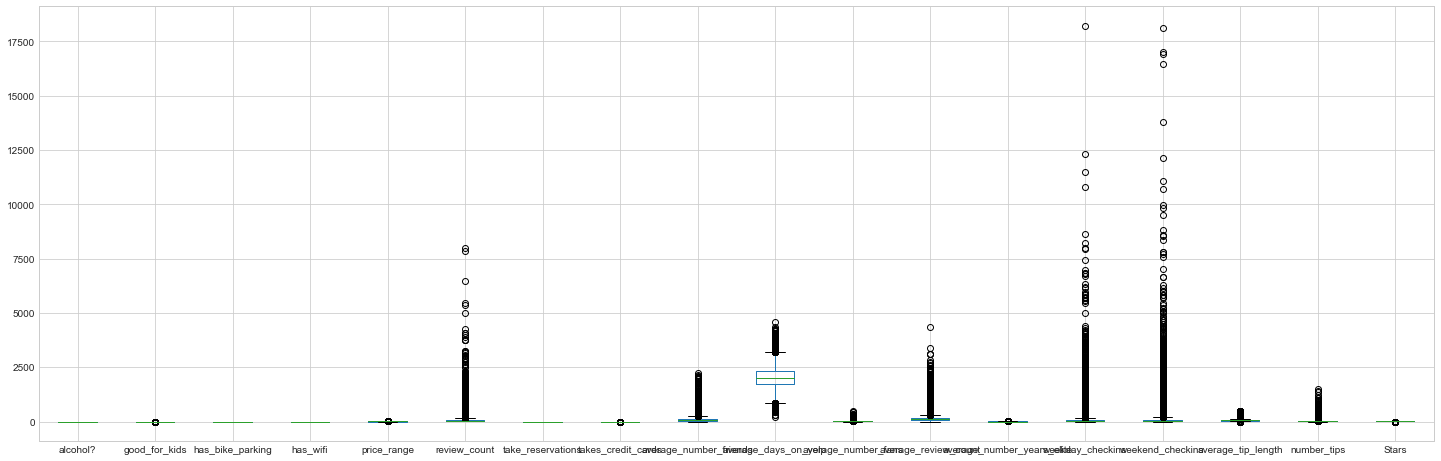

In [39]:
df.plot(kind='box', return_type='axes', figsize=(25,8))
plt.show()

In [40]:
df.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'price_range', 'review_count', 'take_reservations', 'takes_credit_cards', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'Stars'], dtype='object')

In [41]:
df.has_bike_parking.value_counts() 

1    27252
0    20712
Name: has_bike_parking, dtype: int64

In [42]:
df["alcohol?"].value_counts()

0    26838
1    21126
Name: alcohol?, dtype: int64

In [43]:
df.price_range.value_counts()

2    24273
1    17985
0     2962
3     2336
4      408
Name: price_range, dtype: int64

In [44]:
df.good_for_kids.value_counts()

1    36883
0    11081
Name: good_for_kids, dtype: int64

In [45]:
df.takes_credit_cards.value_counts()

1    41115
0     6849
Name: takes_credit_cards, dtype: int64

In [46]:
df.take_reservations.value_counts()

0    30864
1    17100
Name: take_reservations, dtype: int64

In [49]:
# Outlier detecion and suppression function

def outlier_detect_and_suppression(col):    
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - IQR*1.5
    upper_limit = Q3 + IQR*1.5
    lower_outlier = (df[col] < (lower_limit)) # outliers that under the lower limit
    upper_outlier = (df[col] > (upper_limit)) # outliers that above the upper limit
    all_outlier = (df[col] > (upper_limit)) | (df[col] > (upper_limit)) # all outliers
    print(f"********* ({col}) *********")
    print("Total Object Count \t: ", df[col].shape[0])
    print("Lower Limit \t\t: " + "%.2f" % (lower_limit))
    print("Upper Limit \t\t: " + "%.2f" % (upper_limit))
    print("Total Lower Outliers \t: ", df[lower_outlier].shape[0])
    print("Total Upper Outliers \t: ", df[upper_outlier].shape[0])
    print("Total Outliers \t\t: ", df[lower_outlier].shape[0] + df[upper_outlier].shape[0])
    print("")
    df[col][lower_outlier] = lower_limit    
    df[col][upper_outlier] = upper_limit 
    print("------Lower Outliers Suppressed------")
    print(df[col][lower_outlier])
    print("")
    print("------Upper Outliers Suppressed------")
    print(df[col][upper_outlier])
    print("")
    print("")

In [50]:
#coll = df.drop("Stars", axis = 1).columns
coll = ['review_count','average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips']
for i in coll:
    outlier_detect_and_suppression(i)

********* (review_count) *********
Total Object Count 	:  47964
Lower Limit 		: -80.50
Upper Limit 		: 163.50
Total Lower Outliers 	:  0
Total Upper Outliers 	:  5174
Total Outliers 		:  5174

------Lower Outliers Suppressed------
Series([], Name: review_count, dtype: float64)

------Upper Outliers Suppressed------
business_id
_c3ixq9jYKxhLUB0czi0ug   163.50
0jtRI7hVMpQHpUVtUy4ITw   163.50
cKRMmytHxaSt8F0SMEzKqg   163.50
F73T-N5lRNL2Gcpg0Q4KKw   163.50
s2gjJKptpkmwSXYRtfptZQ   163.50
                          ...  
WpI5MZC3XzlTpcUOKXzCbA   163.50
wWDQDPuuwQ5kFeT2a72b6Q   163.50
g62SlImzhs6_1t-knPjd8w   163.50
W5d8iNog90R-qw43m5dGwg   163.50
kbaXNZLUyVuWbeQxH-NNKw   163.50
Name: review_count, Length: 5174, dtype: float64


********* (average_number_friends) *********
Total Object Count 	:  47964
Lower Limit 		: -77.01
Upper Limit 		: 250.05
Total Lower Outliers 	:  0
Total Upper Outliers 	:  3119
Total Outliers 		:  3119

------Lower Outliers Suppressed------
Series([], Name: average_nu

In [51]:
def detect_outliers(data, features):
    outlier_indices = []
    for c in features:
        # 1st quartile Q1
        Q1 = np.percentile(data[c], 25)
        # Q1 = df[c].quantile(0.25)
        # 3st quartile Q3
        Q3 = np.percentile(data[c], 75)
        # Q3 = df[c].quantile(0.75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 0)
    return multiple_outliers

In [52]:
df.loc[detect_outliers(df, df.columns)]

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  Stars
business_id                                                                                                                                                                                                                                                                                                                                   
tZnSodhPwNr4bzrwJ1CSbw         1              0                 1         0            2        146.00                  1                   1                   76.57               2549.23                12.04                136.20                        1.60             41.00            107.00               50.41        17.00      7
vJIuDBdu01vCA8y1fwR1OQ         0              0                 1         0            0          3.00                  0                   1                   95.67               1970.00                 2.00                 43.33                        0.00              1.00              0.00              115.25         2.00      2
gJ5xSt6147gkcZ9Es0WxlA         0              0                 0         0            0          5.00                  0                   0                   28.80                844.13                 1.00                 15.60                        0.20              7.00              6.00               17.00         1.00      5
3ByGQOVgds2YEu6kzl-XEQ         0              0                 0         1            1          3.00                  0                   1                  250.05               2825.67                29.69                211.33                        2.97              5.00              7.00               49.00         1.00      4
6YC6CsXRrmPv_iwfvc9onA         0              0                 0         0            2         11.00                  0                   1                   17.27               1355.00                 1.36                 46.45                        0.36              3.00              2.00               35.50         2.00      5
...                          ...            ...               ...       ...          ...           ...                ...                 ...                     ...                   ...                  ...                   ...                         ...               ...               ...                 ...          ...    ...
R7XBYjReOUx1mE_gD5CjUA         0              1                 0         0            1          4.00                  0                   1                   28.00               1330.75                 5.00                 84.75                        0.50              7.00              8.00               97.67         3.00      1
QcTpYpgEYSZ6vPGgz3LiDQ         0              1                 0         0            0          3.00                  0                   1                   50.67               1496.67                 2.33                 51.00                        0.67              2.00              3.00              108.00         2.00      1
dYO978rkgyeg6tIQHuEStg         0              1                 0         0            1          8.00                  0                   1                  250.05               1943.38                29.69                301.75                        0.50             14.00              8.00               75.00         3.00      1
cFyeqi2ClsEE9W6AqoWXow         0              1                 0         0            1          5.00                  0                   1                   44.80               1867.80                 0.00                  8.80                        0.00             18.00              1.00               31.50         2.00      1
ev4f

In [ ]:
# Belirlediğimiz Featurelara/Bağımsız değişkenlere ait outlier değerler baskılandı.
# The outlier values ​​of the Features (Independent variables) that we have determined have been suppressed.

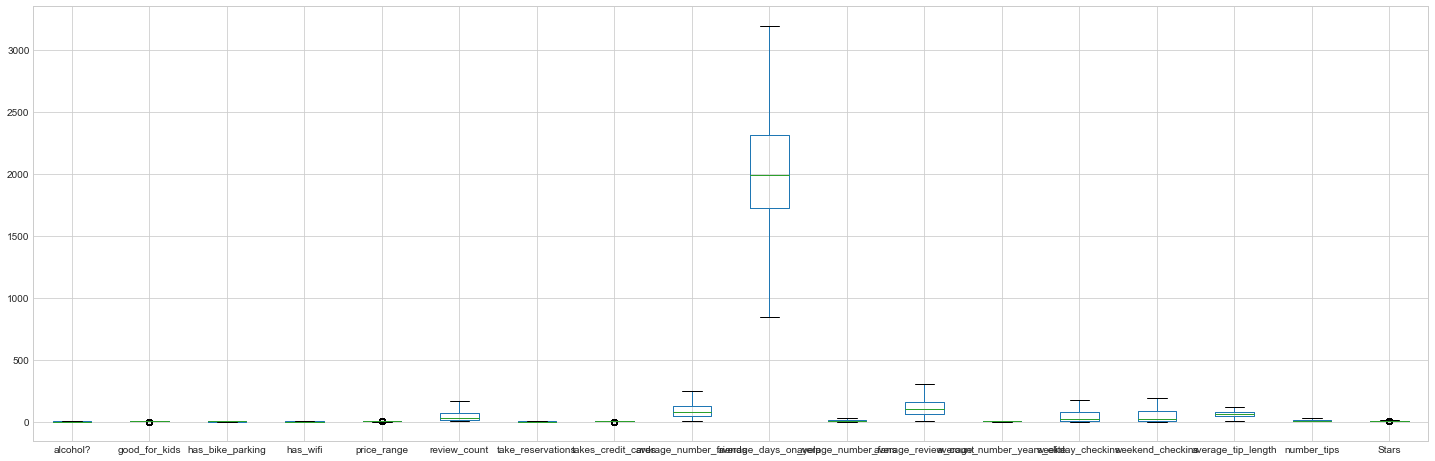

In [53]:
df.plot(kind='box', return_type='axes', figsize=(25,8))
plt.show()

# Visualization

In [56]:
# histograms for the numeric variables.

def plot_hist(variable):
    plt.hist(df[variable], bins = 30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

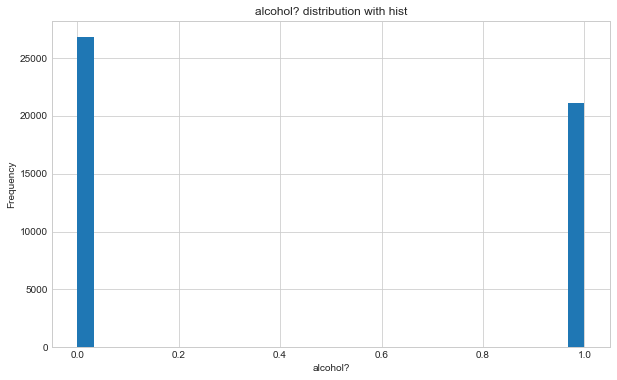

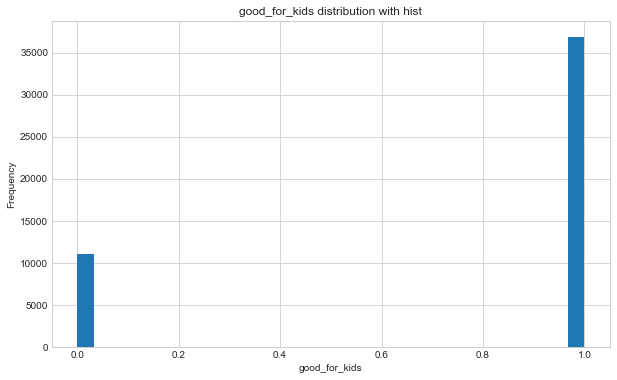

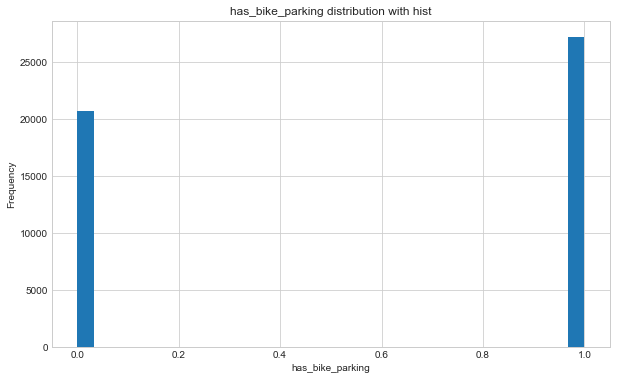

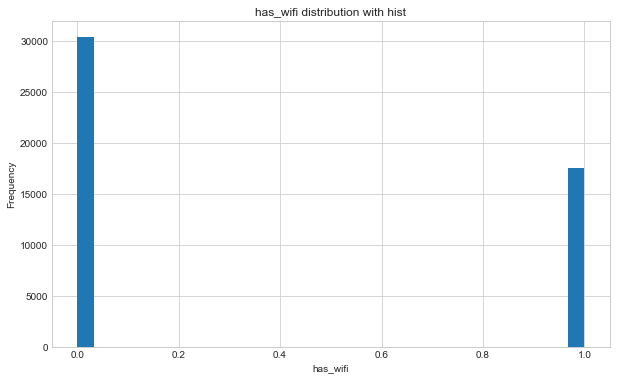

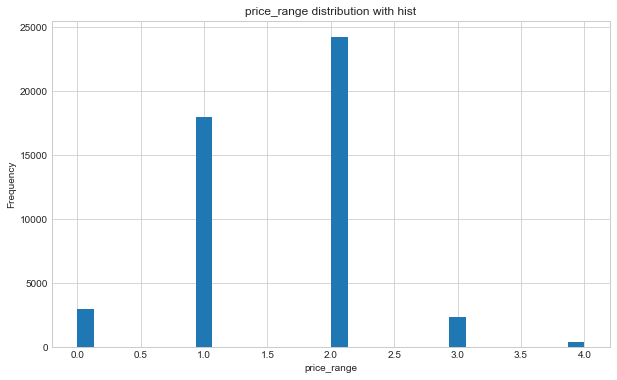

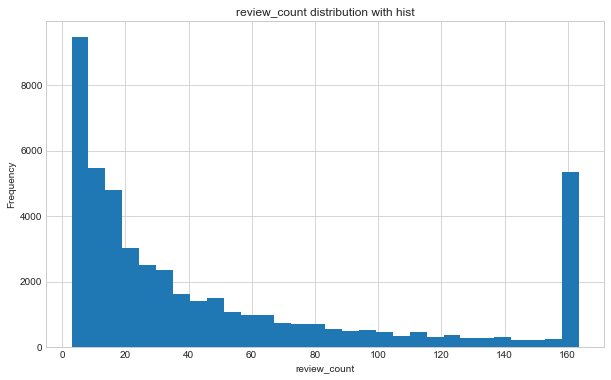

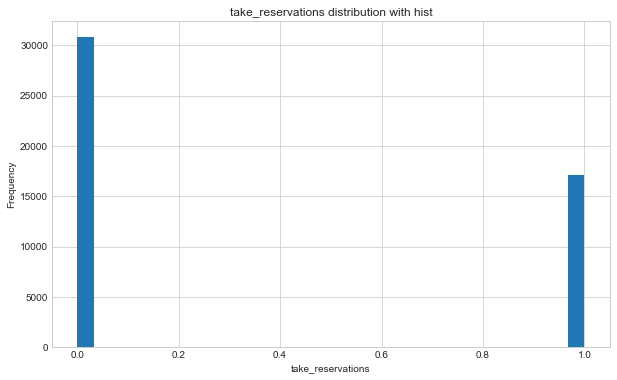

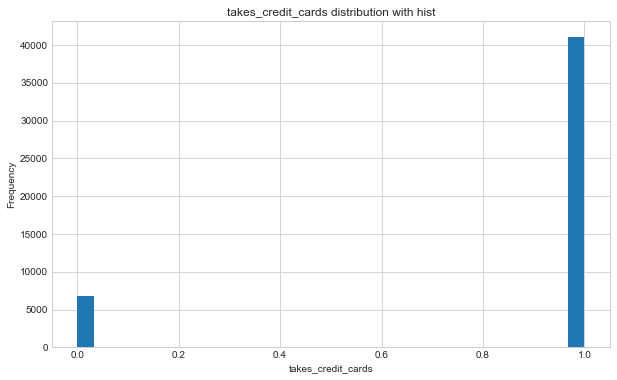

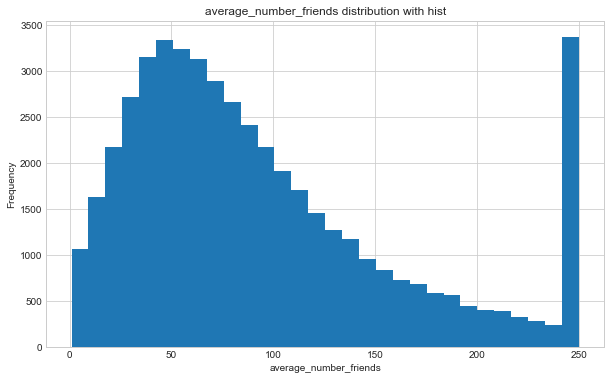

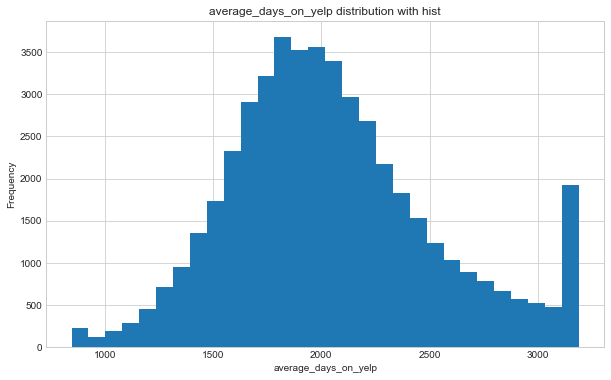

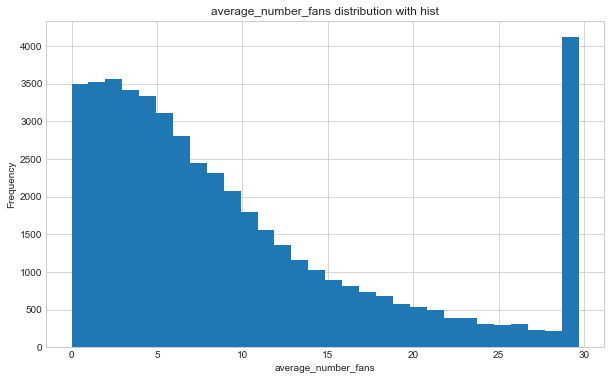

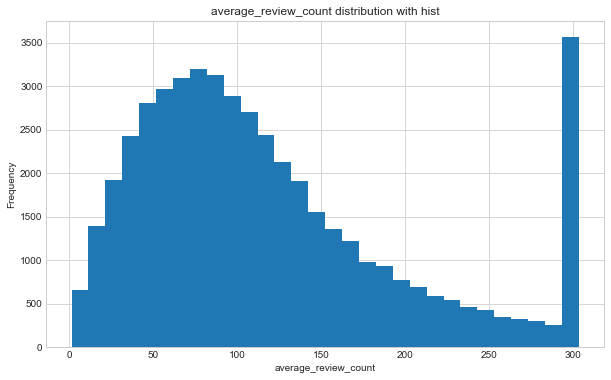

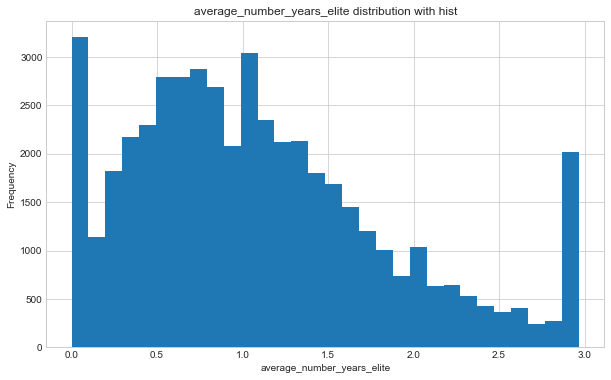

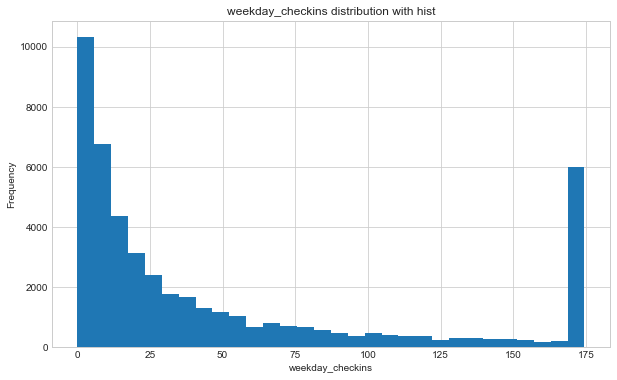

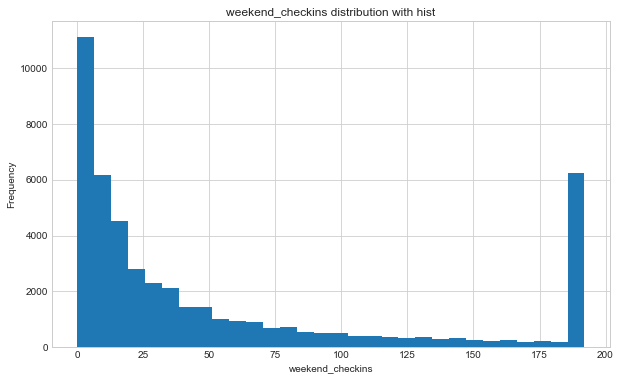

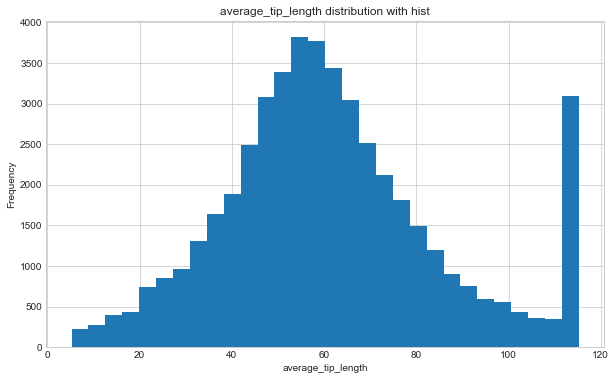

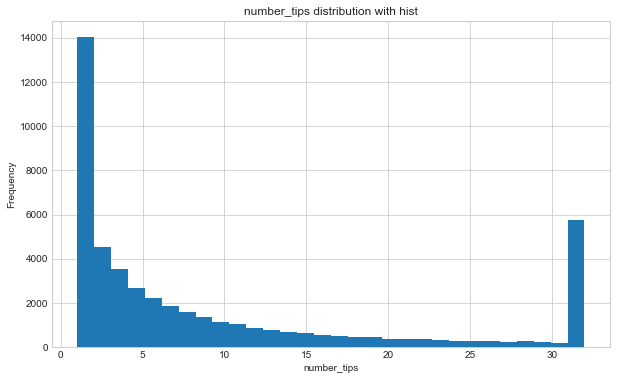

In [57]:
numericVar = df.drop("Stars", axis = 1).columns
for n in numericVar:
    plot_hist(n)

In [58]:
coll2 = ['review_count','average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 
        'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', "Stars"]

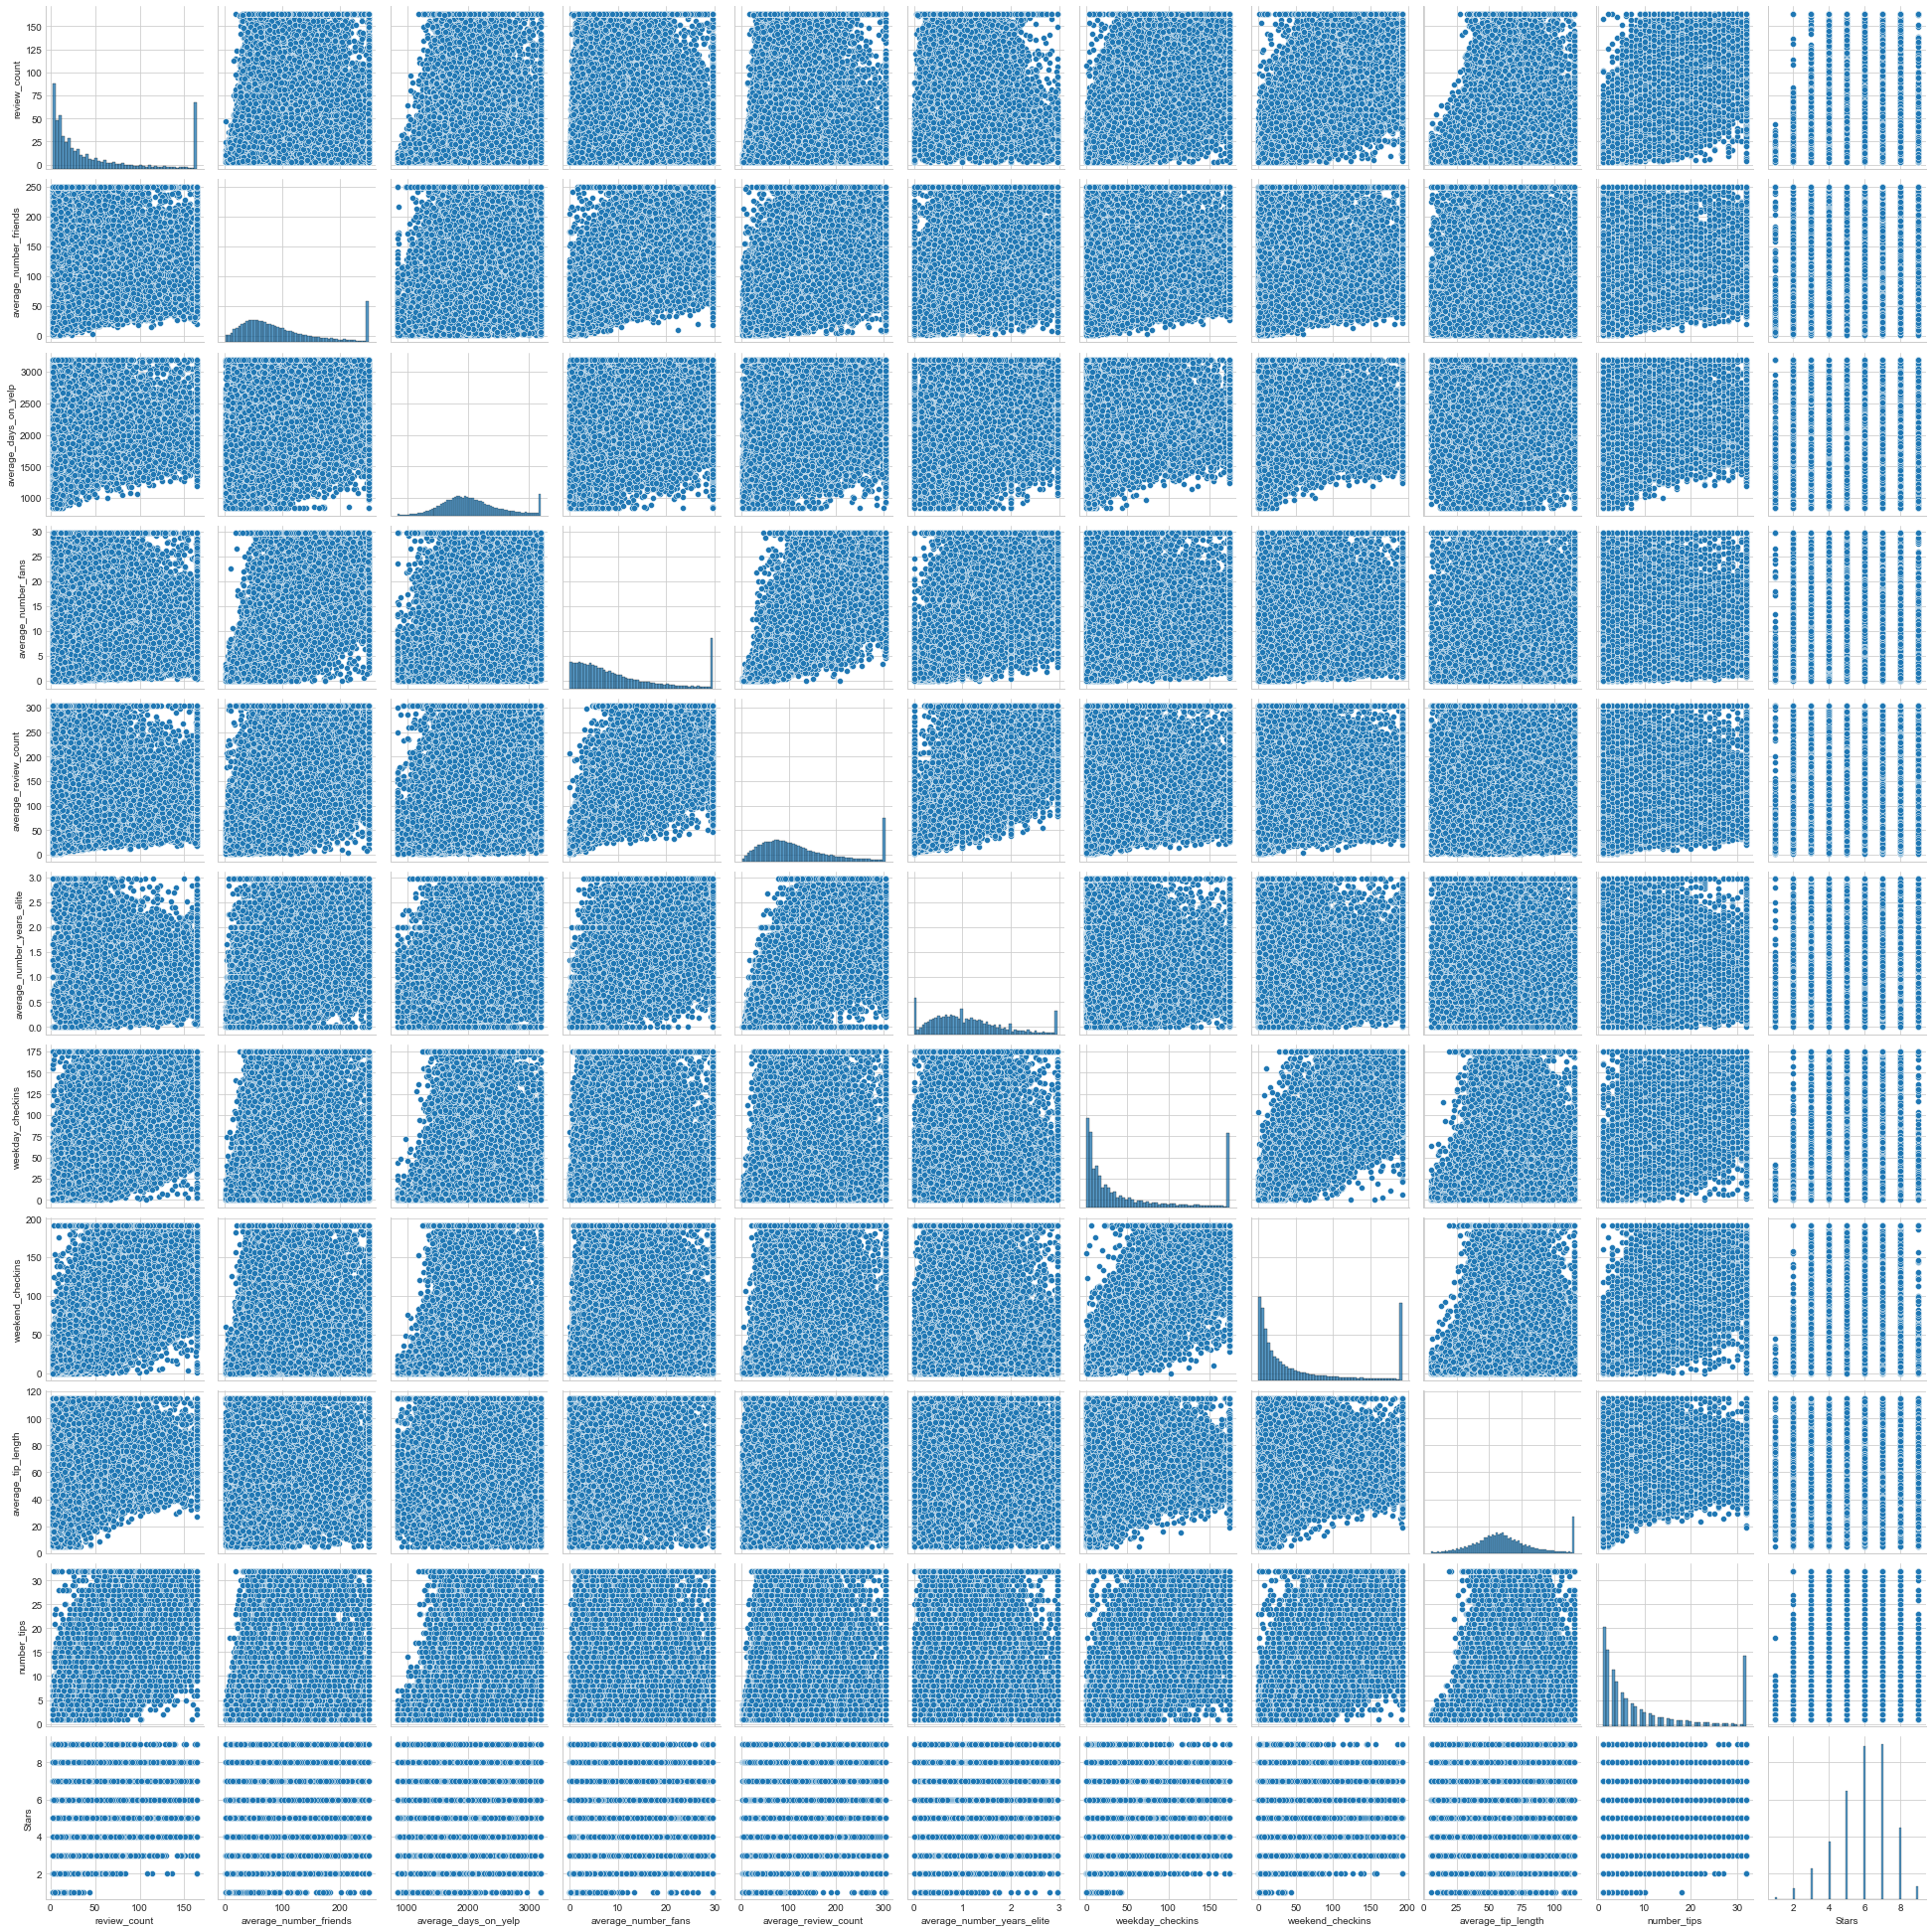

In [59]:
sns.pairplot(df[coll2]);

# Statistical Analysis

In [60]:
df.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'price_range', 'review_count', 'take_reservations', 'takes_credit_cards', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'Stars'], dtype='object')

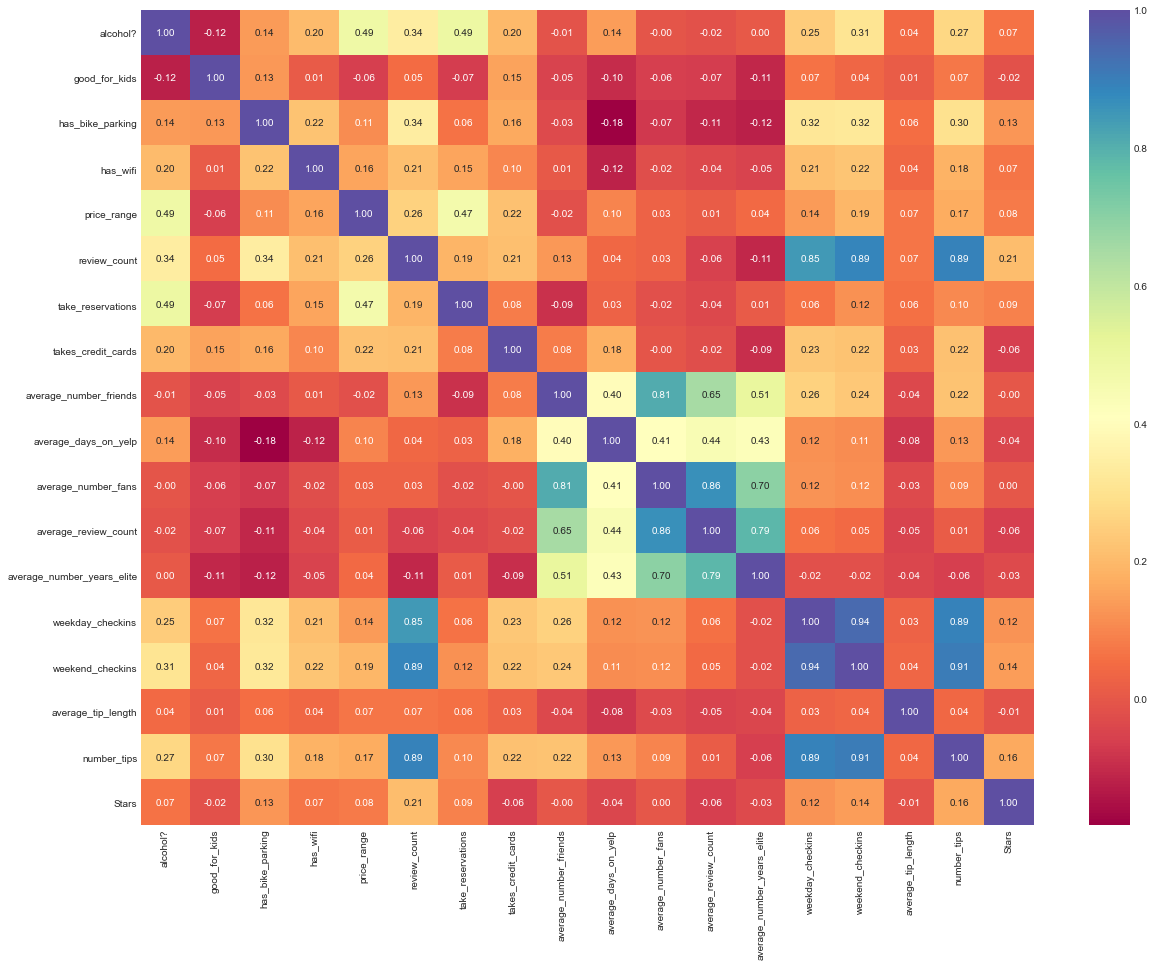

In [61]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Spectral");

In [62]:
corr = df.corr().Stars
corr[np.argsort(corr, axis= 0)[:-1]]

takes_credit_cards           -0.06
average_review_count         -0.06
average_days_on_yelp         -0.04
average_number_years_elite   -0.03
good_for_kids                -0.02
average_tip_length           -0.01
average_number_friends       -0.00
average_number_fans           0.00
alcohol?                      0.07
has_wifi                      0.07
price_range                   0.08
take_reservations             0.09
weekday_checkins              0.12
has_bike_parking              0.13
weekend_checkins              0.14
number_tips                   0.16
review_count                  0.21
Name: Stars, dtype: float64

<AxesSubplot:>

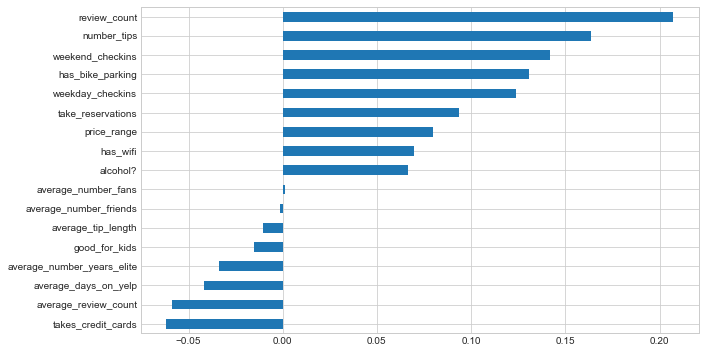

In [63]:
df.corr()['Stars'].drop('Stars').sort_values().plot.barh()

# Determine Dependent and Independent Variables

In [64]:
df.reset_index("business_id", inplace = True)
df.head()

business_id  alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  Stars
0  Apn5Q_b6Nz61Tq4XzPdf9A         0              1                 0         0            2         24.00                  1                   1                   42.83               1809.38                 5.38                114.88                        1.12             11.00             18.00               38.00         6.00      7
1  AjEbIBw6ZFfln7ePHha9PA         0              1                 0         0            2          3.00                  0                   1                   64.33                970.33                 2.67                 19.67                        0.67              0.00              1.00               66.00         1.00      8
2  O8S5hYJ1SMc8fA4QBtVujA         1              1                 1         1            2          5.00                  1                   0                    4.20               1499.60                 1.00                 24.60                        0.60              2.00              5.00               32.00         1.00      7
3  8-NRKkPY1UiFXW20WXKiXg         0              1                 1         0            1         40.00                  0                   1                   84.65               2363.50                 6.33                110.45                        1.20             75.00             54.00               48.83        18.00      4
4  KapTdGyGs7RK0c68Z6hhhg         0              1                 0         0            0         12.00                  0                   0                   68.75               1336.17                 7.58                 85.17                        1.33              4.00              3.00               33.00         1.00      2

In [65]:
df = df.drop("business_id", axis = 1)

In [66]:
df = df.sample(5000)

In [67]:
X = df.drop("Stars", axis = 1)
y = df.Stars

In [68]:
X.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00

In [69]:
y.head()

4734     4
22859    5
45919    4
30170    7
30777    8
Name: Stars, dtype: int32

## Polynomials of Features

In [70]:
from sklearn.preprocessing import PolynomialFeatures
polinomial_converter = PolynomialFeatures(degree= 2, include_bias= False)
x_poly = polinomial_converter.fit_transform(X)

In [71]:
x_poly

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.84900000e+03, 4.30000000e+01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.24000000e+02, 1.80000000e+01, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.11312598e+03, 1.47100000e+03, 1.02400000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.12225000e+03, 6.70000000e+01, 4.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.10250000e+02, 2.90000000e+01, 4.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.44400000e+03, 3.80000000e+01, 1.00000000e+00]])

In [72]:
print("x_poly\t: ",x_poly.shape)
print("X\t: ",X.shape)

x_poly	:  (5000, 170)
X	:  (5000, 17)


## Applying Kernel PCA

In [73]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA()

In [75]:
pca.fit(x_poly)

PCA()

Text(0, 0.5, 'Cumulative explained variance')

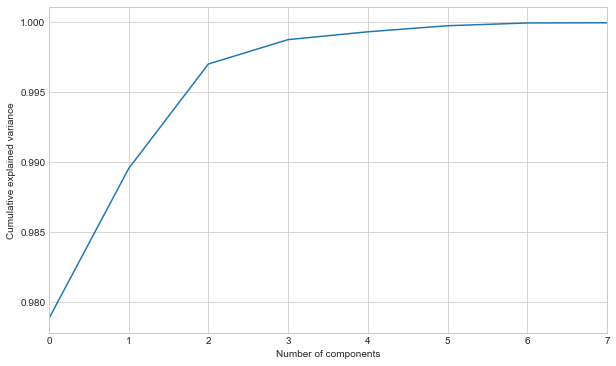

In [76]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [77]:
# %99 temsil ile 3 column a indirgenebilir.
# It can be reduced to 3 columns with 99% representation.

In [78]:
pca = PCA(n_components= 3) # whiten= True normalize  

In [79]:
pca.fit(x_poly)

PCA(n_components=3)

In [80]:
X_pca = pca.transform(x_poly)

In [81]:
X_pca.shape

(5000, 3)

In [82]:
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.9788313  0.01070375 0.00746428]
sum:  0.9969993368819284


In [83]:
X = X_pca

## Train - Test Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [86]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (4500, 3)
X_test : (500, 3)
y_train : (4500,)
y_test : (500,)


## Use Pipeline and Grid Search All Machine Learning Methods and Scaling Methods
    * Logistic Regression 
    * KNN 
    * SVM
    * Decision Tree
    * Random Forest
    
    * StandartScaler
    * Normalize
    * MinMax
    * MinAbs
    * Power
    * Robust
    * Quantile

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

### GRIDSEARCH MODELİNG

#### Logistic Regression

In [88]:
log_grid = LogisticRegression()

#param_grid = {"C": np.power(10.0, np.arange(-10, 10)), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#             'penalty': ['l1','l2']}

param_grid = {"C": np.logspace(-4, 4, 20), 
              'solver': ['liblinear'], 
              "penalty" : ['l1', 'l2']}

log_grid_model = GridSearchCV(log_grid, param_grid, cv= 2, scoring= "accuracy", n_jobs = -1, verbose = 3, refit= True)
log_grid_model.fit(X_train, y_train)
log_grid_model.best_estimator_

Fitting 2 folds for each of 40 candidates, totalling 80 fits


LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')

In [89]:
log_final = log_grid_model.best_estimator_
log_final.fit(X_train, y_train)
log_final.score(X_train, y_train)

0.2762222222222222

#### KNN

In [90]:
knn_grid = KNeighborsClassifier()
k_values = range(1,12)
param_grid = {"n_neighbors": k_values, "weights": ["uniform", "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 5, scoring= "accuracy", n_jobs = -1, verbose = 3, refit= True)
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_estimator_

Fitting 5 folds for each of 22 candidates, totalling 110 fits


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [91]:
knn_final = knn_grid_model.best_estimator_
knn_final.fit(X_train, y_train)
knn_final.score(X_train, y_train)

1.0

#### SVC

In [92]:
svc_grid = SVC()
#param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4]}
param_grid = {'C':[0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
              "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]
             }
svc_grid_model = GridSearchCV(svc_grid, param_grid, cv = 2, n_jobs = -1, verbose = 3, refit= True)
svc_grid_model.fit(X_train, y_train)
svc_grid_model.best_estimator_

Fitting 2 folds for each of 64 candidates, totalling 128 fits


SVC(C=0.0001, gamma=0.0001)

In [93]:
svc_final = svc_grid_model.best_estimator_
svc_final.fit(X_train, y_train)
svc_final.score(X_train, y_train)

0.2608888888888889

#### Decision Trees

In [94]:
dt_grid = DecisionTreeClassifier()
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": range(1,10),
              "min_samples_split" : list(range(2,50))
             }
dt_grid_model = GridSearchCV(dt_grid, param_grid, cv = 2, n_jobs = -1, verbose = 3, refit= True)
dt_grid_model.fit(X_train, y_train)
dt_grid_model.best_estimator_

Fitting 2 folds for each of 864 candidates, totalling 1728 fits


DecisionTreeClassifier(max_depth=2)

In [95]:
dt_final = dt_grid_model.best_estimator_
dt_final.fit(X_train, y_train)
dt_final.score(X_train, y_train)

0.2817777777777778

#### Random Forest

In [96]:
rf_grid = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500,1000],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8],
                'criterion' :['gini', 'entropy']
             }
rf_grid_model = GridSearchCV(rf_grid, param_grid, cv = 2, n_jobs = -1, verbose = 3, refit= True)
rf_grid_model.fit(X_train, y_train)
rf_grid_model.best_estimator_

Fitting 2 folds for each of 90 candidates, totalling 180 fits


RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=200)

In [97]:
rf_final = rf_grid_model.best_estimator_
rf_final.fit(X_train, y_train)
rf_final.score(X_train, y_train)

0.2971111111111111

### Pipeline

In [98]:
log1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", log_final)
])
KNN1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", knn_final)
])
SVM1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", svc_final)
])
DT1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", dt_final)
])
RF1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", rf_final)
])
log2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", log_final)
])
KNN2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", knn_final)
])
SVM2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", svc_final)
])
DT2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", dt_final)
])
RF2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", rf_final)
])
log3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", log_final)
])
KNN3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", knn_final)
])
SVM3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", svc_final)
])
DT3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", dt_final)
])
RF3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", rf_final)
])
log4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", log_final)
])
KNN4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", knn_final)
])
SVM4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", svc_final)
])
DT4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", dt_final)
])
RF4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", rf_final)
])
log5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", log_final)
])
KNN5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", knn_final)
])
SVM5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", svc_final)
])
DT5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", dt_final)
])
RF5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", rf_final)
])
log6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", log_final)
])
KNN6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", knn_final)
])
SVM6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", svc_final)
])
DT6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", dt_final)
])
RF6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", rf_final)
])
log7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", log_final)
])
KNN7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", knn_final)
])
SVM7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", svc_final)
])
DT7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", dt_final)
])
RF7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", rf_final)
])

In [99]:
scaler_dict = {
    0: "StandartScaler_log_reg",
    1: "StandartScaler_KNN",
    2: "StandartScaler_SVM",
    3: "StandartScaler_Dec_Tree",
    4: "StandartScaler_Ran_For",
    5: "MinMaxScaler_log_reg",
    6: "MinMaxScaler_KNN",
    7: "MinMaxScaler_SVM",
    8: "MinMaxScaler_Dec_Tree",
    9: "MinMaxScaler_Ran_For",
    10: "Normalize_log_reg",
    11: "Normalize_KNN",
    12: "Normalize_SVM",
    13: "Normalize_Dec_Tree",
    14: "Normalize_Ran_For",
    15: "Max_Abs_log_reg",
    16: "Max_Abs_KNN",
    17: "Max_Abs_SVM",
    18: "Max_Abs_Dec_Tree",
    19: "Max_Abs_Ran_For",
    20: "RobustScaler_log_reg",
    21: "RobustScaler_KNN",
    22: "RobustScaler_SVM",
    23: "RobustScaler_Dec_Tree",
    24: "RobustScaler_Ran_For",
    25: "PowerTransform_log_reg",
    26: "PowerTransform_KNN",
    27: "PowerTransform_SVM",
    28: "PowerTransform_Dec_Tree",
    29: "PowerTransform_Ran_For",
    30: "QuantileTransformer_log_reg",
    31: "QuantileTransformer_KNN",
    32: "QuantileTransformer_SVM",
    33: "QuantileTransformer_Dec_Tree",
    34: "QuantileTransformer_Ran_For",
}

In [100]:
# list our model
ml_list = [log1, KNN1, SVM1, DT1, RF1, log2, KNN2, SVM2, DT2, RF2, log3, KNN3, SVM3, DT3, RF3, log4, KNN4, SVM4, DT4, RF4,
          log5, KNN5, SVM5, DT5, RF5, log6, KNN6, SVM6, DT6, RF6, log7, KNN7, SVM7, DT7, RF7]

# fit X_train and y_train variables
for ml in ml_list:
    ml.fit(X_train, y_train)
    
# find the best model in pipeline
for key, val in enumerate(ml_list):
    print("%s Pipeline Train accuracy: %.4f"%
         (scaler_dict[key], val.score(X_train, y_train)))
    print("%s Pipeline Test accuracy: %.4f"%
         (scaler_dict[key], val.score(X_test, y_test)))

StandartScaler_log_reg Pipeline Train accuracy: 0.1831
StandartScaler_log_reg Pipeline Test accuracy: 0.1880
StandartScaler_KNN Pipeline Train accuracy: 0.2007
StandartScaler_KNN Pipeline Test accuracy: 0.2020
StandartScaler_SVM Pipeline Train accuracy: 0.2609
StandartScaler_SVM Pipeline Test accuracy: 0.2780
StandartScaler_Dec_Tree Pipeline Train accuracy: 0.2724
StandartScaler_Dec_Tree Pipeline Test accuracy: 0.2780
StandartScaler_Ran_For Pipeline Train accuracy: 0.2609
StandartScaler_Ran_For Pipeline Test accuracy: 0.2720
MinMaxScaler_log_reg Pipeline Train accuracy: 0.2727
MinMaxScaler_log_reg Pipeline Test accuracy: 0.2880
MinMaxScaler_KNN Pipeline Train accuracy: 0.2236
MinMaxScaler_KNN Pipeline Test accuracy: 0.2380
MinMaxScaler_SVM Pipeline Train accuracy: 0.2609
MinMaxScaler_SVM Pipeline Test accuracy: 0.2780
MinMaxScaler_Dec_Tree Pipeline Train accuracy: 0.2731
MinMaxScaler_Dec_Tree Pipeline Test accuracy: 0.2720
MinMaxScaler_Ran_For Pipeline Train accuracy: 0.2722
MinMaxScal

In [101]:
# En iyi scaler: QuantileTransformer
# En iyi model:  RandomForestClassifier

optimum_model = Pipeline([                            
    ("scl", QuantileTransformer()),
    ("mlr", rf_final)
])

optimum_model.fit(X_train, y_train)

Pipeline(steps=[('scl', QuantileTransformer()),
                ('mlr',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        max_features='log2',
                                        n_estimators=200))])

In [102]:
print(f"X_train R2 score(accuracy) : ", RF7.score(X_train, y_train))
print(f"X_test R2 score(accuracy) : ", RF7.score(X_test, y_test))

X_train R2 score(accuracy) :  0.294
X_test R2 score(accuracy) :  0.282


## Evaluate All Models

In [103]:
from yellowbrick.classifier import ROCAUC

In [104]:
models = [log_final, knn_final,svc_final,dt_final,rf_final]

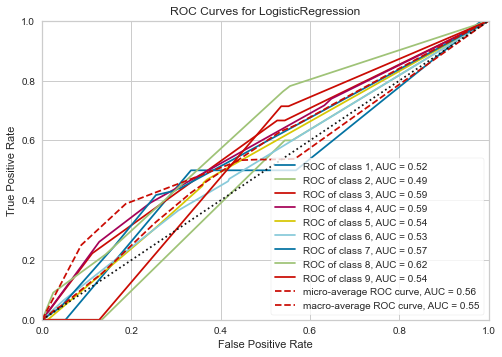

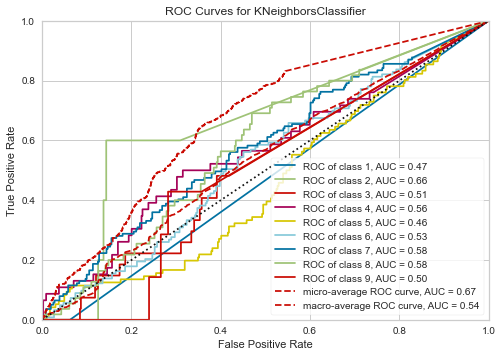

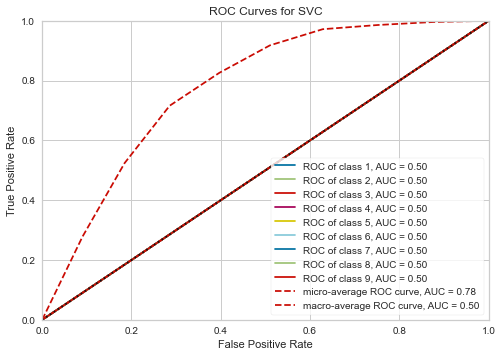

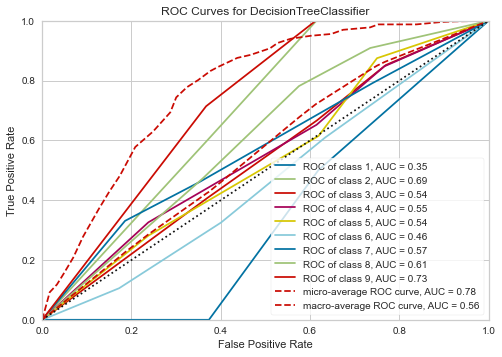

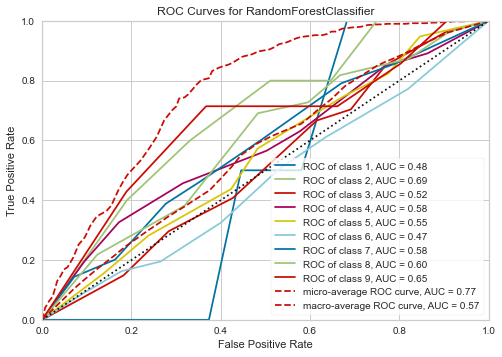

In [105]:
for model in models:
    visualizer = ROCAUC(model)                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    

## Unsuperwised Learning Methods

In [106]:
# Removing Target Value

In [107]:
X = df.drop("Stars", axis = 1)

In [108]:
X.shape

(5000, 17)

## Hopkins Test

In [109]:
from pyclustertend import hopkins

In [110]:
hopkins(X, X.shape[0])

0.25575785963439296

## Choosing The Optimal Number of Clusters

### Silhouette Analysis

In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [112]:
list_silhouette_score = []
range_n_clusters = range(2, 15)
for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters= num_clusters, random_state= 42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    list_silhouette_score.append(silhouette_avg)
    print(f"for n_clusters = {num_clusters}, the silhouette score is {silhouette_avg}") 

for n_clusters = 2, the silhouette score is 0.5039567785508583
for n_clusters = 3, the silhouette score is 0.4312086800198257
for n_clusters = 4, the silhouette score is 0.37948000307050006
for n_clusters = 5, the silhouette score is 0.35117488586763257
for n_clusters = 6, the silhouette score is 0.3174962510240745
for n_clusters = 7, the silhouette score is 0.3218091101154038
for n_clusters = 8, the silhouette score is 0.3044965581145095
for n_clusters = 9, the silhouette score is 0.316714394395137
for n_clusters = 10, the silhouette score is 0.29947678783787407
for n_clusters = 11, the silhouette score is 0.300356202696354
for n_clusters = 12, the silhouette score is 0.2808233444567754
for n_clusters = 13, the silhouette score is 0.2906333115243908
for n_clusters = 14, the silhouette score is 0.29277166984600556


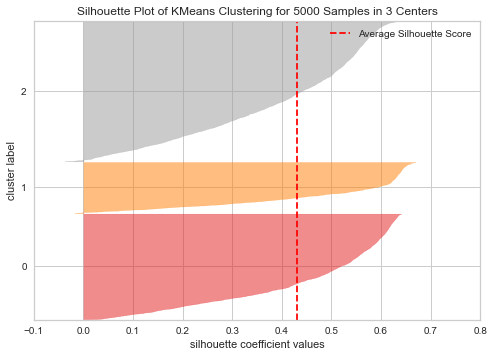

In [113]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(3, random_state= 42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)
visualizer.poof();

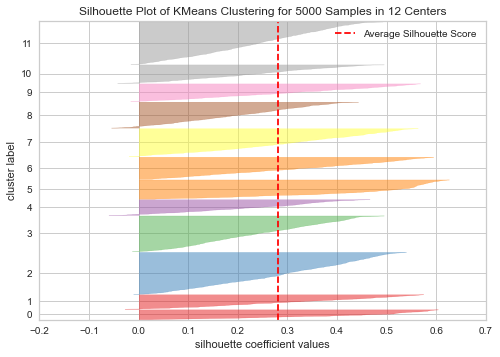

In [114]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model3 = KMeans(12, random_state= 42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(X)
visualizer.poof();

### Elbow Method

In [115]:
from sklearn.cluster import KMeans

In [116]:
ssd = []
K = range(2, 15)
for k in K:
    model = KMeans(n_clusters= k, random_state= 42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

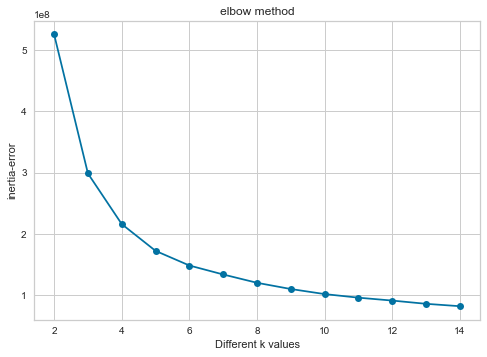

In [117]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

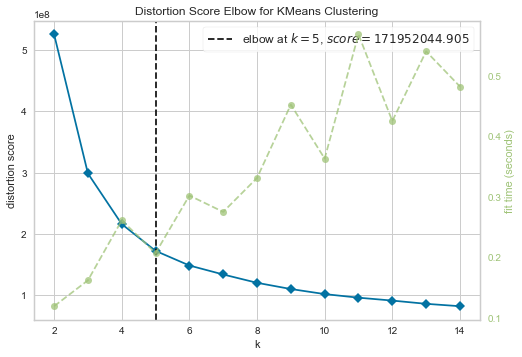

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state= 42)
visualizer = KElbowVisualizer(model,k= (2, 15))
visualizer.fit(X)
visualizer.show()

In [119]:
ssd

[526022285.6843982,
 298521087.91297734,
 215740875.76170614,
 171952044.9050552,
 148014964.43718174,
 133321120.86991328,
 119719544.8041911,
 109534519.15675302,
 101263915.13092862,
 95380324.52664083,
 90639076.79546392,
 85351374.22892334,
 81429500.57114646]

In [120]:
pd.Series(ssd).diff()

0              NaN
1    -227501197.77
2     -82780212.15
3     -43788830.86
4     -23937080.47
5     -14693843.57
6     -13601576.07
7     -10185025.65
8      -8270604.03
9      -5883590.60
10     -4741247.73
11     -5287702.57
12     -3921873.66
dtype: float64

In [121]:
pd.DataFrame(-pd.Series(ssd).diff(), index= range(1, 13))

0
1  227501197.77
2   82780212.15
3   43788830.86
4   23937080.47
5   14693843.57
6   13601576.07
7   10185025.65
8    8270604.03
9    5883590.60
10   4741247.73
11   5287702.57
12   3921873.66

In [122]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index= lambda x : x + 1)

In [123]:
df_diff

0
1           NaN
2  227501197.77
3   82780212.15
4   43788830.86
5   23937080.47
6   14693843.57
7   13601576.07
8   10185025.65
9    8270604.03
10   5883590.60
11   4741247.73
12   5287702.57
13   3921873.66

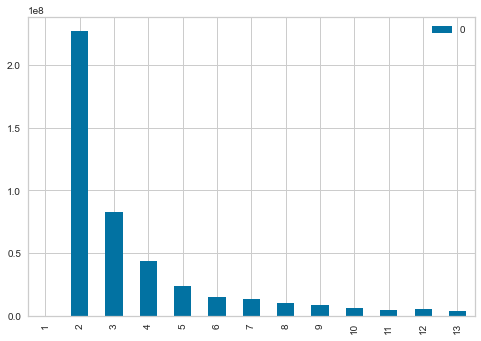

In [124]:
df_diff.plot(kind = "bar");

## K_Means Clustering

In [125]:
from sklearn.cluster import KMeans

In [126]:
X.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00

In [127]:
model = KMeans(n_clusters = 9, random_state = 42)

In [128]:
model.fit(X)

KMeans(n_clusters=9, random_state=42)

In [129]:
model.labels_

array([4, 8, 5, ..., 4, 7, 7])

In [130]:
model.inertia_

109534519.15675302

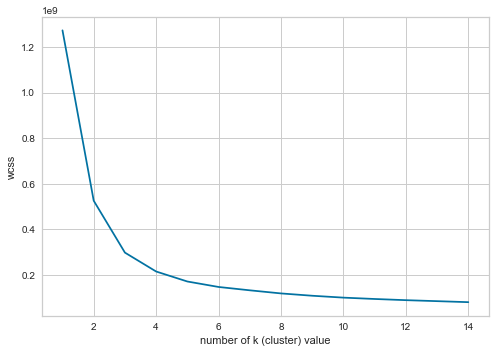

In [131]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [132]:
model.cluster_centers_

array([[5.49180328e-01, 6.12021858e-01, 4.91803279e-02, 1.36612022e-01,
        1.60109290e+00, 2.53142077e+01, 3.77049180e-01, 8.68852459e-01,
        1.53404707e+02, 3.11004176e+03, 1.79985402e+01, 1.98834636e+02,
        1.84489851e+00, 3.01557377e+01, 3.17049180e+01, 5.05817722e+01,
        7.35245902e+00],
       [3.70114943e-01, 7.96551724e-01, 6.06896552e-01, 4.33333333e-01,
        1.53563218e+00, 3.95247126e+01, 3.55172414e-01, 7.78160920e-01,
        6.74292136e+01, 1.58135699e+03, 6.10358563e+00, 8.00877043e+01,
        7.81109633e-01, 2.97873563e+01, 3.45149425e+01, 6.23668692e+01,
        6.49770115e+00],
       [7.02500000e-01, 7.50000000e-01, 8.55000000e-01, 5.07500000e-01,
        1.81000000e+00, 1.38748750e+02, 4.82500000e-01, 9.80000000e-01,
        1.31124248e+02, 2.26207703e+03, 1.25898372e+01, 1.32395519e+02,
        1.11060996e+00, 1.59150000e+02, 1.74812500e+02, 6.16812304e+01,
        2.76400000e+01],
       [2.24242424e-01, 6.72727273e-01, 3.51515152e-01, 3.272

In [133]:
data = X

In [134]:
data.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00

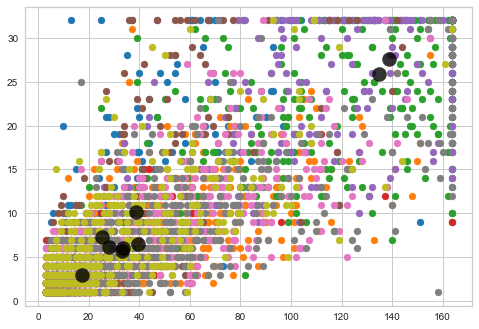

In [135]:
# k = 9
kmeans = KMeans(n_clusters= 9)
clusters = kmeans.fit_predict(data)

data["label"] = clusters

plt.scatter(data.loc[:,"review_count"][data.label == 0], data.loc[:,"number_tips"][data.label == 0], color = "#1f77b4")
plt.scatter(data.loc[:,"review_count"][data.label == 1], data.loc[:,"number_tips"][data.label == 1], color = "#ff7f0e")
plt.scatter(data.loc[:,"review_count"][data.label == 2], data.loc[:,"number_tips"][data.label == 2], color = "#2ca02c")
plt.scatter(data.loc[:,"review_count"][data.label == 3], data.loc[:,"number_tips"][data.label == 3], color = "#d62728")
plt.scatter(data.loc[:,"review_count"][data.label == 4], data.loc[:,"number_tips"][data.label == 4], color = "#9467bd")
plt.scatter(data.loc[:,"review_count"][data.label == 5], data.loc[:,"number_tips"][data.label == 5], color = "#8c564b")
plt.scatter(data.loc[:,"review_count"][data.label == 6], data.loc[:,"number_tips"][data.label == 6], color = "#e377c2")
plt.scatter(data.loc[:,"review_count"][data.label == 7], data.loc[:,"number_tips"][data.label == 7], color = "#7f7f7f")
plt.scatter(data.loc[:,"review_count"][data.label == 8], data.loc[:,"number_tips"][data.label == 8], color = "#bcbd22")
plt.scatter(data.loc[:,"review_count"][data.label == 9], data.loc[:,"number_tips"][data.label == 9], color = "#17becf")

plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 16], color= "black", s= 200, alpha= 0.8)
plt.show()

In [136]:
centers = model.cluster_centers_
centers

array([[5.49180328e-01, 6.12021858e-01, 4.91803279e-02, 1.36612022e-01,
        1.60109290e+00, 2.53142077e+01, 3.77049180e-01, 8.68852459e-01,
        1.53404707e+02, 3.11004176e+03, 1.79985402e+01, 1.98834636e+02,
        1.84489851e+00, 3.01557377e+01, 3.17049180e+01, 5.05817722e+01,
        7.35245902e+00],
       [3.70114943e-01, 7.96551724e-01, 6.06896552e-01, 4.33333333e-01,
        1.53563218e+00, 3.95247126e+01, 3.55172414e-01, 7.78160920e-01,
        6.74292136e+01, 1.58135699e+03, 6.10358563e+00, 8.00877043e+01,
        7.81109633e-01, 2.97873563e+01, 3.45149425e+01, 6.23668692e+01,
        6.49770115e+00],
       [7.02500000e-01, 7.50000000e-01, 8.55000000e-01, 5.07500000e-01,
        1.81000000e+00, 1.38748750e+02, 4.82500000e-01, 9.80000000e-01,
        1.31124248e+02, 2.26207703e+03, 1.25898372e+01, 1.32395519e+02,
        1.11060996e+00, 1.59150000e+02, 1.74812500e+02, 6.16812304e+01,
        2.76400000e+01],
       [2.24242424e-01, 6.72727273e-01, 3.51515152e-01, 3.272

In [137]:
# review_count - number_tips Dağılım Grafiği

In [138]:
df.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'price_range', 'review_count', 'take_reservations', 'takes_credit_cards', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'Stars'], dtype='object')

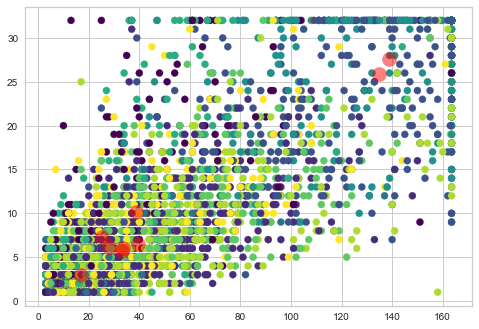

In [139]:
plt.scatter(data.iloc[:,5], data.iloc[:,16], c = data.label, s= 50, cmap = "viridis")
plt.scatter(centers[:, 5], centers[:, 16], c = "red", s= 200, alpha= 0.5);

In [140]:
# average_number_friends - average_days_on_yelp Dağılım Grafiği

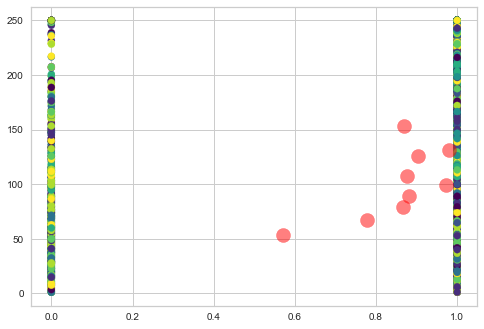

In [141]:
plt.scatter(data.iloc[:,7], data.iloc[:,8], c = data.label, s= 50, cmap = "viridis")
plt.scatter(centers[:, 7], centers[:, 8], c = "red", s= 200, alpha= 0.5);

In [142]:
# average_tip_length - number_tips Dağılım Grafiği

In [143]:
data.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'price_range', 'review_count', 'take_reservations', 'takes_credit_cards', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'label'], dtype='object')

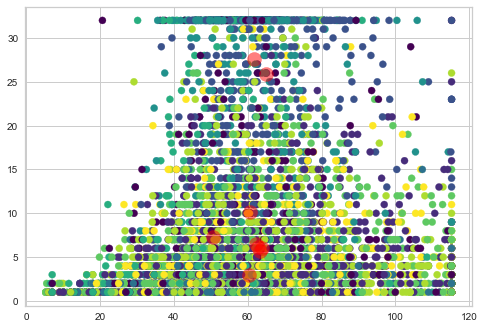

In [144]:
plt.scatter(data.iloc[:,15], data.iloc[:,16], c = data.label, s= 50, cmap = "viridis")
plt.scatter(centers[:, 15], centers[:, 16], c = "red", s= 200, alpha= 0.5);

In [145]:
data.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  label
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00      6
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00      0
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00      2
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00      5
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00      1

## Hierarchical Clustering

In [146]:
from scipy.cluster.hierarchy import linkage, dendrogram

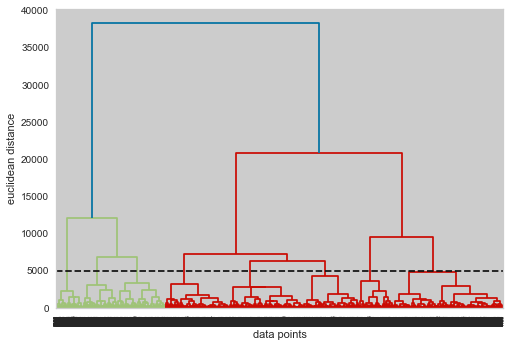

In [147]:
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation= 90)
plt.axhline(5000, ls="--", c="k")
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [148]:
# y-ekseninde kümeler arasındaki uzaklığın en az 5000 baz alınarak alt sınır (threshold) uygulandı.
# Alt sınır çizgisi dikey 9 sütunu kesmektedir.
# Dendrogram grafiğine göre k = 9 olarak değerlendirilmiştir.
# (En uzun bacaktan çizilen yatay çizgi küme sayısını verir.)

# Threshold was applied based on the distance between clusters on the y-axis at least 5000.
# The lower border line crosses 9 vertical columns.
# It is evaluated as k = 9 according to the dendrogram graph.
# (The horizontal line drawn from the longest leg gives the number of clusters.)

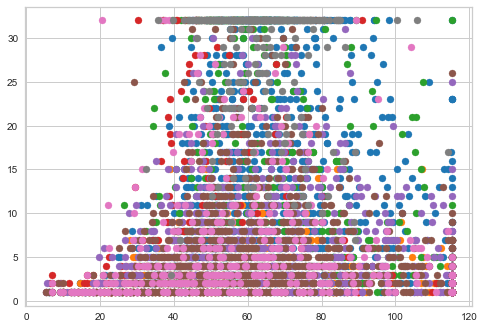

In [150]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters = 8, affinity= "euclidean", linkage= "ward")
cluster = hierarchical_cluster.fit_predict(data)

data["label"] = cluster

plt.scatter(data.loc[:,"average_tip_length"][data.label == 0], data.loc[:,"number_tips"][data.label == 0], color = "#1f77b4")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 1], data.loc[:,"number_tips"][data.label == 1], color = "#ff7f0e")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 2], data.loc[:,"number_tips"][data.label == 2], color = "#2ca02c")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 3], data.loc[:,"number_tips"][data.label == 3], color = "#d62728")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 4], data.loc[:,"number_tips"][data.label == 4], color = "#9467bd")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 5], data.loc[:,"number_tips"][data.label == 5], color = "#8c564b")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 6], data.loc[:,"number_tips"][data.label == 6], color = "#e377c2")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 7], data.loc[:,"number_tips"][data.label == 7], color = "#7f7f7f")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 8], data.loc[:,"number_tips"][data.label == 8], color = "#bcbd22")
plt.scatter(data.loc[:,"average_tip_length"][data.label == 9], data.loc[:,"number_tips"][data.label == 9], color = "#17becf")

plt.show()

In [151]:
data.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  label
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00      4
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00      6
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00      0
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00      3
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00      0

In [152]:
df.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  Stars
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00      4
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00      5
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00      4
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00      7
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00      8

In [153]:
model.labels_

array([4, 8, 5, ..., 4, 7, 7])

In [154]:
df["predicted_clusters"] = model.labels_

In [155]:
df.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  Stars  predicted_clusters
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00      4                   4
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00      5                   8
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00      4                   5
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00      7                   0
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00      8                   7

In [156]:
ct = pd.crosstab(df.predicted_clusters, df.Stars)
ct

Stars               1   2   3   4    5    6    7    8   9
predicted_clusters                                       
0                   1   3  20  49   96   98   72   24   3
1                   3  34  51  87  127  162  225  153  27
2                   0   0   2  18   55  127  157   41   0
3                   6  13  24  30   44   57   77   52  27
4                   1  11  42  86  156  207  195   83  13
5                   0   0   4  27   62  122  151   85   3
6                   0   6  26  61  108  132  107   38   8
7                   1  17  64  91  165  203  222  124  16
8                   0   2  24  34   77  122  107   28   4

### Adjust Rand Score

In [157]:
df_end = df
df_end

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  Stars  predicted_clusters
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00      4                   4
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00      5                   8
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00      4                   5
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00      7                   0
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00      8                   7
...         ...            ...               ...       ...          ...           ...                ...                 ...                     ...                   ...                  ...                   ...                         ...               ...               ...                 ...          ...    ...                 ...
30595         0              1                 1         0            1         88.00                  0                   1                  113.09               2122.43                 7.17                 65.19                        0.55             69.00             68.00               53.59        17.00      6                   4
28681         1              1                 0         0            2         40.00                  1                   1                   41.70               2709.88                 4.90                 87.67                        1.45             38.00             26.00               47.59        17.00      6                   8
13627         0              0                 1         0            2          5.00                  0                   0                   49.60               2153.80                12.20                118.60                        1.00              4.00              4.00               33.50         2.00      9                   4
26542         1              1                 1         0            2         25.00                  0                   1                   52.80               1872.56                 1.84                 45.16                        0.52             25.00             12.00               14.50         2.00      6                   7
47627         0              1                 0         0            1          6.00                  0                   1                   40.00               1801.67                 9.00                 87.83                        2.17              2.00              1.00            

In [158]:
from sklearn.metrics import adjusted_rand_score

In [159]:
adjusted_rand_score(df_end.Stars, df_end.predicted_clusters)

0.0015129145871375326

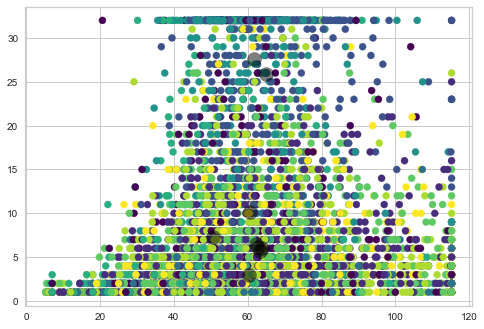

In [160]:
plt.scatter(df.iloc[:, 15], df.iloc[:, 16], c= clusters, s= 50, cmap= "viridis")
plt.scatter(centers[:, 15], centers[:, 16], c= "black", s= 200, alpha= 0.5)

### Remodeling According To Discriminating Features

In [161]:
df.head()

alcohol?  good_for_kids  has_bike_parking  has_wifi  price_range  review_count  take_reservations  takes_credit_cards  average_number_friends  average_days_on_yelp  average_number_fans  average_review_count  average_number_years_elite  weekday_checkins  weekend_checkins  average_tip_length  number_tips  Stars  predicted_clusters
4734          0              1                 0         0            1          7.00                  0                   1                   40.43               2148.71                 5.86                148.29                        1.29             26.00             11.00               43.00         1.00      4                   4
22859         1              1                 0         0            2          3.00                  0                   1                   42.00               2675.00                 1.00                 32.00                        0.00              3.00              2.00               18.00         1.00      5                   8
45919         1              1                 0         1            2        103.00                  0                   1                   94.73               1757.12                 6.83                 86.53                        0.53            174.50            156.00               45.97        32.00      4                   5
30170         0              1                 0         0            1         13.00                  0                   1                  250.05               2898.85                29.69                296.08                        2.97             11.00              7.00               23.00         1.00      7                   0
30777         1              1                 0         0            3         46.00                  1                   1                   47.11               1788.09                 4.54                 75.96                        1.13             26.00             23.00               60.45        11.00      8                   7

In [162]:
clus_pred = df.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters               0       1       2       3       4       5       6       7       8
alcohol?                      0.55    0.37    0.70    0.22    0.42    0.68    0.37    0.40    0.51
good_for_kids                 0.61    0.80    0.75    0.67    0.78    0.83    0.74    0.81    0.69
has_bike_parking              0.05    0.61    0.85    0.35    0.62    0.85    0.55    0.64    0.31
has_wifi                      0.14    0.43    0.51    0.33    0.32    0.57    0.30    0.39    0.27
price_range                   1.60    1.54    1.81    1.21    1.58    1.75    1.51    1.55    1.67
review_count                 25.31   39.56  138.75   16.81   33.36  134.84   27.91   33.25   38.77
take_reservations             0.38    0.36    0.48    0.34    0.38    0.43    0.33    0.33    0.37
takes_credit_cards            0.87    0.78    0.98    0.57    0.88    0.97    0.88    0.87    0.90
average_number_friends      153.40   67.45  131.12   53.01   88.94   99.47  107.33   79.05  125.96
average_days_on_yelp       3110.04 1581.22 2262.08 1224.49 2086.87 1923.07 2377.24 1833.59 2705.68
average_number_fans          18.00    6.11   12.59    4.41    9.85    8.37   12.73    8.15   14.56
average_review_count        198.83   80.02  132.40   63.90  124.74   97.17  154.11  104.46  170.00
average_number_years_elite    1.84    0.78    1.11    0.65    1.16    0.80    1.42    0.94    1.58
weekday_checkins             30.16   29.81  159.15   10.77   29.77  149.01   28.72   25.01   47.38
weekend_checkins             31.70   34.55  174.81   11.96   31.77  165.52   30.98   27.99   52.53
average_tip_length           50.58   62.39   61.68   60.25   63.87   64.99   62.79   63.24   60.58
number_tips                   7.35    6.50   27.64    2.97    6.03   25.93    6.15    5.70   10.09
Stars                         5.61    6.01    6.36    6.01    5.87    6.44    5.74    5.90    5.87

In [163]:
Z = data.iloc[:,[15,16]]
Z.head()

average_tip_length  number_tips
4734                43.00         1.00
22859               18.00         1.00
45919               45.97        32.00
30170               23.00         1.00
30777               60.45        11.00

Hopkins Test

In [164]:
hopkins(Z, Z.shape[0])

0.08556928931649921

### Elbow Method

In [165]:
ssd = []
K = range(2, 15)
for k in K:
    model3 = KMeans(n_clusters= k)
    model3.fit(Z)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

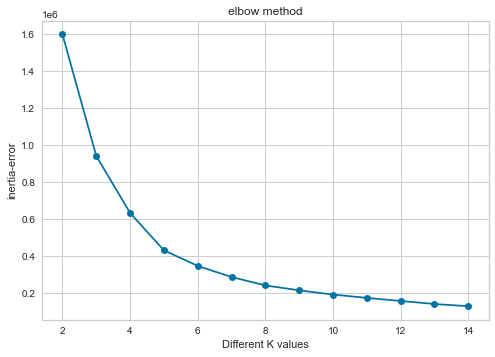

In [166]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different K values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [167]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index= lambda x : x + 1)
df_diff

0
1        NaN
2  657176.46
3  307540.29
4  201842.42
5   83975.07
6   60106.04
7   45302.05
8   26563.70
9   22962.29
10  17755.87
11  16727.35
12  16328.76
13  11960.30

<AxesSubplot:>

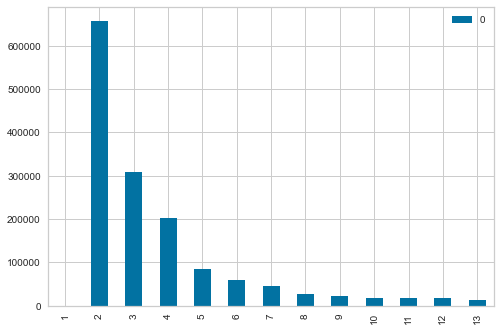

In [168]:
df_diff.plot(kind ="bar")

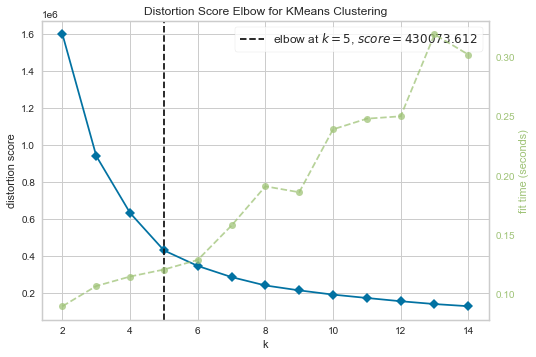

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [169]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state= 42)
visualizer = KElbowVisualizer(model,k= (2, 15))
visualizer.fit(Z)
visualizer.show()

In [170]:
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(Z)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Z, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4671410242837286
For n_clusters=3, the silhouette score is 0.4270811661689839
For n_clusters=4, the silhouette score is 0.4802511520743289
For n_clusters=5, the silhouette score is 0.4741750723539739
For n_clusters=6, the silhouette score is 0.4490962275756277
For n_clusters=7, the silhouette score is 0.44510366300622645
For n_clusters=8, the silhouette score is 0.42799770586709673
For n_clusters=9, the silhouette score is 0.41065513410420573
For n_clusters=10, the silhouette score is 0.4138760835200945
For n_clusters=11, the silhouette score is 0.40490409992251114
For n_clusters=12, the silhouette score is 0.4173278014505652
For n_clusters=13, the silhouette score is 0.428445408491846
For n_clusters=14, the silhouette score is 0.41834043058472137


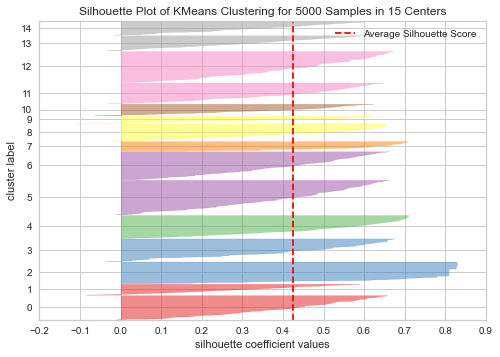

In [171]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(15, random_state= 42)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(Z)
visualizer.poof();

### Building the model based on the optimal number of clusters

In [172]:
model2 = KMeans(n_clusters= 9, random_state= 42)
model2.fit(Z)

KMeans(n_clusters=9, random_state=42)

In [173]:
model2.labels_

array([5, 7, 3, ..., 2, 7, 2])

In [174]:
Z["Stars"] = df["Stars"]

In [175]:
Z["predicted_clusters"] = model2.labels_

In [176]:
Z

average_tip_length  number_tips  Stars  predicted_clusters
4734                43.00         1.00      4                   5
22859               18.00         1.00      5                   7
45919               45.97        32.00      4                   3
30170               23.00         1.00      7                   7
30777               60.45        11.00      8                   0
...                   ...          ...    ...                 ...
30595               53.59        17.00      6                   3
28681               47.59        17.00      6                   5
13627               33.50         2.00      9                   2
26542               14.50         2.00      6                   7
47627               38.00         1.00      3                   2

[5000 rows x 4 columns]

In [177]:
Z_end = Z
Z_end

average_tip_length  number_tips  Stars  predicted_clusters
4734                43.00         1.00      4                   5
22859               18.00         1.00      5                   7
45919               45.97        32.00      4                   3
30170               23.00         1.00      7                   7
30777               60.45        11.00      8                   0
...                   ...          ...    ...                 ...
30595               53.59        17.00      6                   3
28681               47.59        17.00      6                   5
13627               33.50         2.00      9                   2
26542               14.50         2.00      6                   7
47627               38.00         1.00      3                   2

[5000 rows x 4 columns]

In [178]:
adjusted_rand_score(Z_end.Stars, Z_end.predicted_clusters)

0.0031160944540128714

In [179]:
pd.crosstab(Z.predicted_clusters, Z.Stars)

Stars               1   2   3   4    5    6    7    8   9
predicted_clusters                                       
0                   0  10  45  73  142  195  198   80  16
1                   0  13  30  50   80  106   93   64  10
2                   1  13  46  75  119  122  133   73  21
3                   0   0   2  28   60  175  190   80   3
4                   3  13  28  49   76  109  120   46   8
5                   5  12  43  96  166  180  203  108  20
6                   0  14  32  64  115  163  172   79  13
7                   3   8  26  30   61   69   49   36   7
8                   0   3   5  18   71  111  155   62   3

In [180]:
df.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'price_range', 'review_count', 'take_reservations', 'takes_credit_cards', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'Stars', 'predicted_clusters'], dtype='object')

In [181]:
Z_ct = pd.crosstab(Z.predicted_clusters, Z.Stars).rename(index= {0:2, 2:0})
Z_ct.columns = ["1_z", "2_z", "3_z","4_z","5_z", "6_z", "7_z","8_z","9_z"]
Z_ct

1_z  2_z  3_z  4_z  5_z  6_z  7_z  8_z  9_z
predicted_clusters                                             
2                     0   10   45   73  142  195  198   80   16
1                     0   13   30   50   80  106   93   64   10
0                     1   13   46   75  119  122  133   73   21
3                     0    0    2   28   60  175  190   80    3
4                     3   13   28   49   76  109  120   46    8
5                     5   12   43   96  166  180  203  108   20
6                     0   14   32   64  115  163  172   79   13
7                     3    8   26   30   61   69   49   36    7
8                     0    3    5   18   71  111  155   62    3

In [182]:
X_ct = pd.crosstab(df.predicted_clusters, df.Stars)
X_ct.columns = ["1_x", "2_x", "3_x","4_x","5_x", "6_x", "7_x","8_x","9_x"]
X_ct

1_x  2_x  3_x  4_x  5_x  6_x  7_x  8_x  9_x
predicted_clusters                                             
0                     1    3   20   49   96   98   72   24    3
1                     3   34   51   87  127  162  225  153   27
2                     0    0    2   18   55  127  157   41    0
3                     6   13   24   30   44   57   77   52   27
4                     1   11   42   86  156  207  195   83   13
5                     0    0    4   27   62  122  151   85    3
6                     0    6   26   61  108  132  107   38    8
7                     1   17   64   91  165  203  222  124   16
8                     0    2   24   34   77  122  107   28    4

In [183]:
pd.concat([Z_ct, X_ct], axis= 1)

1_z  2_z  3_z  4_z  5_z  6_z  7_z  8_z  9_z  1_x  2_x  3_x  4_x  5_x  6_x  7_x  8_x  9_x
predicted_clusters                                                                                          
0                     1   13   46   75  119  122  133   73   21    1    3   20   49   96   98   72   24    3
1                     0   13   30   50   80  106   93   64   10    3   34   51   87  127  162  225  153   27
2                     0   10   45   73  142  195  198   80   16    0    0    2   18   55  127  157   41    0
3                     0    0    2   28   60  175  190   80    3    6   13   24   30   44   57   77   52   27
4                     3   13   28   49   76  109  120   46    8    1   11   42   86  156  207  195   83   13
5                     5   12   43   96  166  180  203  108   20    0    0    4   27   62  122  151   85    3
6                     0   14   32   64  115  163  172   79   13    0    6   26   61  108  132  107   38    8
7                     3    8   26   30   61   69   49   36    7    1   17   64   91  165  203  222  124   16
8                     0    3    5   18   71  111  155   62    3    0    2   24   34   77  122  107   28    4